<a href="https://colab.research.google.com/github/AndrewstheBuilder/VideoSemanticSearch_JiuJitsu/blob/main/CNN_JiuJitsu_Film.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Training

### Process trainset

In [1]:
!unzip /content/train_subset4k.zip -d /content/trainset

Archive:  /content/train_subset4k.zip
   creating: /content/trainset/dataset/
   creating: /content/trainset/dataset/none/
  inflating: /content/trainset/dataset/none/frame_1224.jpg  
  inflating: /content/trainset/dataset/none/frame_11832.jpg  
  inflating: /content/trainset/dataset/none/frame_19650.jpg  
  inflating: /content/trainset/dataset/none/frame_21360.jpg  
  inflating: /content/trainset/dataset/none/frame_4632.jpg  
  inflating: /content/trainset/dataset/none/frame_34800.jpg  
  inflating: /content/trainset/dataset/none/frame_5010.jpg  
  inflating: /content/trainset/dataset/none/frame_3390.jpg  
  inflating: /content/trainset/dataset/none/frame_1230.jpg  
  inflating: /content/trainset/dataset/none/frame_8592.jpg  
  inflating: /content/trainset/dataset/none/frame_3300.jpg  
  inflating: /content/trainset/dataset/none/frame_0744.jpg  
  inflating: /content/trainset/dataset/none/frame_9570.jpg  
  inflating: /content/trainset/dataset/none/frame_14592.jpg  
  inflating: /cont

In [2]:
import torch
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [6]:
transform = transforms.Compose(
    [ transforms.Resize((64, 64)),
      transforms.ToTensor(),
      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_data_path = './trainset/dataset'
train_dataset = datasets.ImageFolder(root=train_data_path, transform=transform)

In [7]:
batch_size = 4 # You can adjust the batch size based on memory availability
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
classes = train_dataset.classes

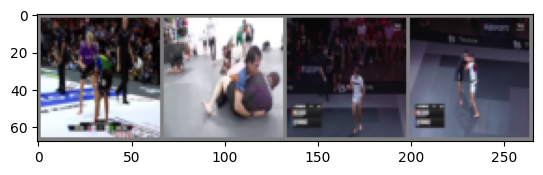

standing pinning none  standing


In [8]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
classes = train_dataset.classes

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))

# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

### Define CNN architecture and Train

In [9]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding='same')
        self.bn1 = nn.BatchNorm2d(32)

        self.conv2 = nn.Conv2d(32, 64, 3, padding='same')
        self.bn2 = nn.BatchNorm2d(64)

        self.conv3 = nn.Conv2d(64, 128, 3, padding='same')
        self.bn3 = nn.BatchNorm2d(128)

        self.pool = nn.MaxPool2d(2, 2)

        self.fc1 = nn.Linear(128 * 8 * 8, 256)
        self.fc2 = nn.Linear(256, 84)
        self.fc3 = nn.Linear(84, len(classes))

    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = self.pool(F.relu(self.bn3(self.conv3(x))))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [10]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
epochs=7

In [11]:
net.train()
for epoch in range(epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        # for name, param in net.named_parameters():
        #   if param.requires_grad:
        #       print(f'{name} grad: {param.grad.abs().mean()}')
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % batch_size == batch_size-1:    # print every batch_size mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / batch_size:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,     4] loss: 1.424
[1,     8] loss: 1.337
[1,    12] loss: 1.398
[1,    16] loss: 1.342
[1,    20] loss: 1.346
[1,    24] loss: 1.450
[1,    28] loss: 1.354
[1,    32] loss: 1.216
[1,    36] loss: 1.271
[1,    40] loss: 1.351
[1,    44] loss: 1.310
[1,    48] loss: 1.249
[1,    52] loss: 1.317
[1,    56] loss: 1.435
[1,    60] loss: 1.278
[1,    64] loss: 1.101
[1,    68] loss: 1.196
[1,    72] loss: 1.219
[1,    76] loss: 1.343
[1,    80] loss: 1.369
[1,    84] loss: 1.158
[1,    88] loss: 1.172
[1,    92] loss: 1.286
[1,    96] loss: 1.150
[1,   100] loss: 1.129
[1,   104] loss: 1.045
[1,   108] loss: 1.000
[1,   112] loss: 1.173
[1,   116] loss: 1.138
[1,   120] loss: 1.055
[1,   124] loss: 0.832
[1,   128] loss: 1.003
[1,   132] loss: 0.972
[1,   136] loss: 0.947
[1,   140] loss: 1.315
[1,   144] loss: 1.541
[1,   148] loss: 1.141
[1,   152] loss: 1.166
[1,   156] loss: 1.216
[1,   160] loss: 1.049
[1,   164] loss: 1.091
[1,   168] loss: 1.051
[1,   172] loss: 0.893
[1,   176] 

In [12]:
print('labels',labels)
classes = train_dataset.classes
print('classes',classes)
t = torch.tensor([[[1, 2],[3, 4]],[[5, 6],[7, 8]]])
print('t.shape',t.shape)
t_flat = torch.flatten(t, 1)
print('t_flat.shape',t_flat.shape)

labels tensor([3, 1, 2])
classes ['guarded', 'none', 'pinning', 'standing']
t.shape torch.Size([2, 2, 2])
t_flat.shape torch.Size([2, 4])


In [13]:
PATH = './kaggle_net.pth'
torch.save(net.state_dict(), PATH)

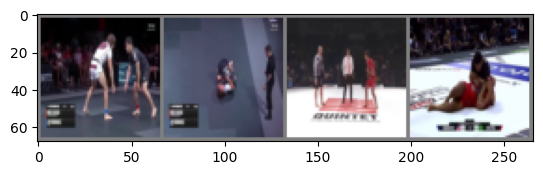

GroundTruth:  standing pinning none  pinning


In [14]:
dataiter = iter(train_loader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [15]:
net = Net()
net.load_state_dict(torch.load(PATH, weights_only=True))

<All keys matched successfully>

In [16]:
outputs = net(images)

In [17]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  standing pinning none  pinning


In [18]:
correct = 0
total = 0
# Set the model to evaluation mode
net.eval()

# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in train_loader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 training images: {100 * correct // total} %')

Accuracy of the network on the 10000 training images: 94 %


In [19]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# Set the model to evaluation mode
net.eval()

# again no gradients needed
with torch.no_grad():
    for data in train_loader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: guarded is 97.0 %
Accuracy for class: none  is 95.3 %
Accuracy for class: pinning is 89.5 %
Accuracy for class: standing is 97.4 %


## Validate model on test set

### Process Test Set

In [21]:
!unzip /content/testset\(1\).zip -d /content/testset

Archive:  /content/testset(1).zip
  inflating: /content/testset/guarded/frame_1890.jpg  
  inflating: /content/testset/guarded/frame_3240.jpg  
  inflating: /content/testset/guarded/frame_4680.jpg  
  inflating: /content/testset/guarded/frame_4860.jpg  
  inflating: /content/testset/guarded/frame_4950.jpg  
  inflating: /content/testset/guarded/frame_5310.jpg  
  inflating: /content/testset/guarded/frame_5490.jpg  
  inflating: /content/testset/guarded/frame_6480.jpg  
  inflating: /content/testset/guarded/frame_6840.jpg  
  inflating: /content/testset/guarded/frame_6930.jpg  
  inflating: /content/testset/guarded/frame_7200.jpg  
  inflating: /content/testset/guarded/frame_7290.jpg  
  inflating: /content/testset/guarded/frame_8190.jpg  
  inflating: /content/testset/none/frame_0000.jpg  
  inflating: /content/testset/none/frame_0540.jpg  
  inflating: /content/testset/none/frame_0630.jpg  
  inflating: /content/testset/none/frame_0720.jpg  
  inflating: /content/testset/none/frame_10

In [22]:
test_data_path = './testset/'
test_dataset = datasets.ImageFolder(root=test_data_path, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

### Evaluate on test set

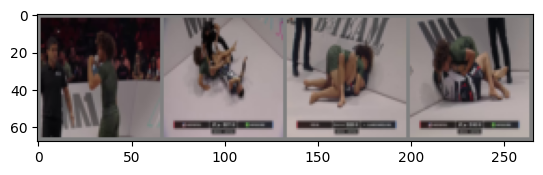

GroundTruth:  none  pinning pinning pinning


In [23]:
dataiter = iter(test_loader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [24]:
outputs = net(images)

In [25]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  none  guarded guarded guarded


In [26]:

correct = 0
total = 0
# Set the model to evaluation mode
net.eval()

# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 training images: {100 * correct // total} %')

Accuracy of the network on the 10000 training images: 43 %


In [27]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# Set the model to evaluation mode
net.eval()

# again no gradients needed
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: guarded is 100.0 %
Accuracy for class: none  is 77.4 %
Accuracy for class: pinning is 4.7 %
Accuracy for class: standing is 41.2 %
